# Explorarea inițială a datelor

In [1]:
# Import librării
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, KFold

In [12]:
   housing = pd.read_csv('house_2.csv')
   housing.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [13]:
 # Afișarea listei cu toate coloanele din DataFrame
print("Coloane:", housing.columns.tolist())

Coloane: ['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']


In [14]:
print("===== Tipurile de date =====")
housing.dtypes

===== Tipurile de date =====


Price        float64
Bedroom      float64
Space        float64
Room         float64
Lot          float64
Tax          float64
Bathroom     float64
Garage       float64
Condition    float64
dtype: object

In [15]:
# Informații despre coloane, tipuri de date și valori lipsă
print("===== Rezumat DataFrame =====")
housing.info()

===== Rezumat DataFrame =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [11]:
print("===== Număr de valori unice per coloană =====")
housing.nunique()   #numără valorile unice per coloană       

===== Număr de valori unice per coloană =====


Price         47
Bedroom        7
Space        137
Room           7
Lot           11
Tax          138
Bathroom       5
Garage         4
Condition      2
dtype: int64

# Set de date: Chicago House Price

Descriere:
Setul de date conține informații despre prețurile caselor din Chicago și caracteristicile acestora. 

Coloane:

* Price – Prețul casei (valoarea țintă pentru predicție)
* Bedroom – Numărul de dormitoare
* Space – Suprafața casei
* Room – Numărul total de camere
* Lot – Dimensiunea terenului
* Tax – Valoarea impozitului pe proprietate
* Bathroom – Numărul de băi
* Garage – Capacitatea garajului (număr de mașini)
* Condition – Starea casei.



In [17]:
# Verificarea valorilor lipsă 
missing_values =housing.isna().sum()
if missing_values.sum() > 0:
    print("Valori lipsă pe coloană:")
    print(missing_values[missing_values > 0])
else:
    print("Nu există valori lipsă în setul de date.")

Valori lipsă pe coloană:
Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64


In [18]:
print("Rânduri dublicate:",housing.duplicated().sum())

Rânduri dublicate: 0


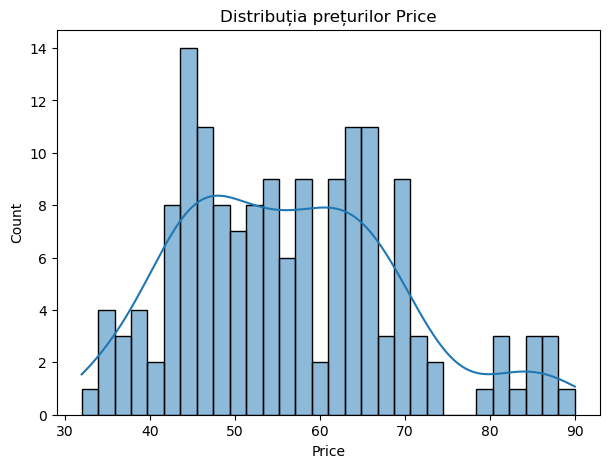

In [19]:
# Distribuția variabilei țintă (Price - prețul median al locuințelor)
# Setearea dimensiunii figurii pentru grafic
plt.figure(figsize=(7,5))  

# Crearea unei histograme cu curba de densitate (KDE) pentru variabila țintă MEDV
sns.histplot(housing['Price'], kde=True, bins=30)  

# Adăugarea titlului pentru grafic
plt.title('Distribuția prețurilor Price')  

# Afișare grafic
plt.show()  


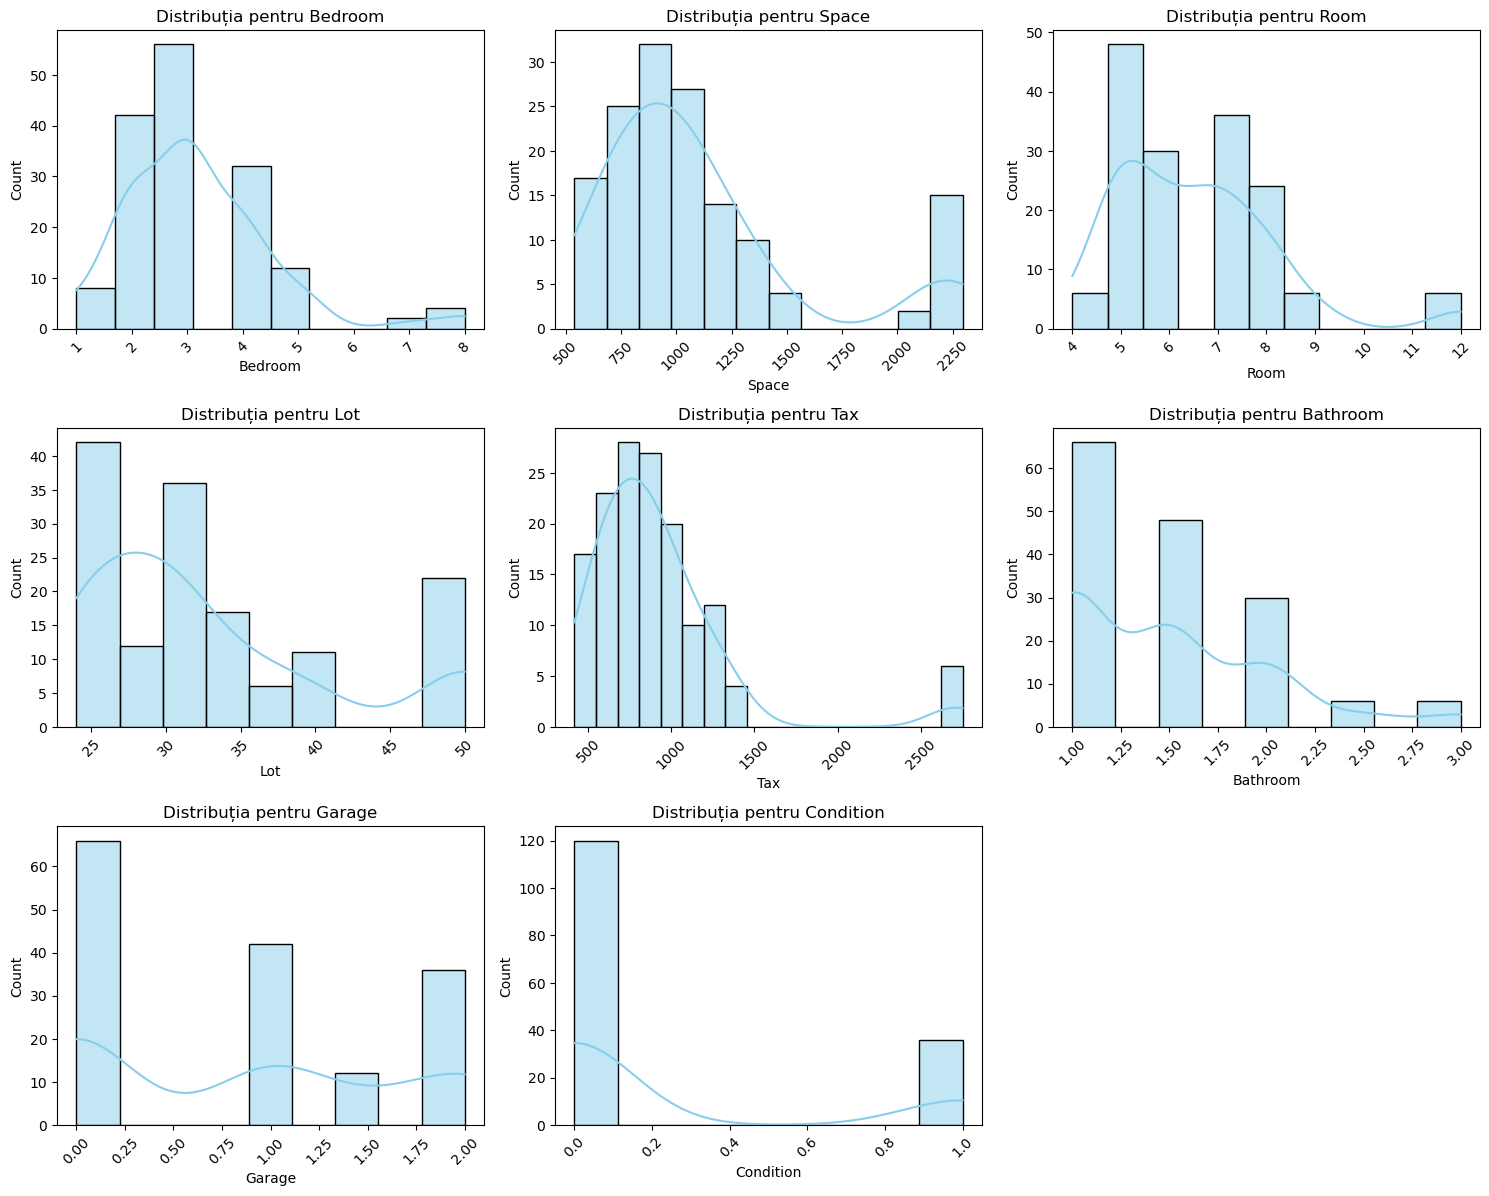

In [20]:
# Distribuția tuturor variabilelor

# Selectarea coloanelor numerice
housing_Copy_plot=housing.drop('Price', axis=1)
num_cols = housing_Copy_plot.select_dtypes(include=[np.number]).columns

# Setare subgraficului
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

# Creare distplot pentru fiecare coloană numerică
for i, col in enumerate(num_cols):
    sns.histplot(housing_Copy_plot[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribuția pentru {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Ascunderea subploturilor goale
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Observații generale asupra distribuțiilor

1. **Bedroom** – bimodală; se observa cele mai multe apartamente cu 2-3 dormitoare
2. **Space** – asimetrie pozitivă; cele mai multe locuințe au o suprafata medie
3. **Room** -ușor asimetrică; majoritatea zonelor au 5 camera, 
4. **Lot** - bimodală; diferențe clare între zonele cu taxe mici și cele cu taxe mari.
5. **Tax** - asimetrie pozitivă ; cele mai multe locuințe au un impozit raportat la suprafata locuintelor
6. **Bathroom** - ușor asimetrică;  Majoritatea locuintelor ao o singura baie.
7. **Garage** - multimodală; majoritatea locuintelor nu au un garaj, iar diferenta intre locuintele cu capacitate de doua masini si una singura este mica,
8. **Condition** - variabilă binară; puține locuințe au o conditie proasta.

### Curățarea datelor

In [33]:
print("===== Date lipsă ===== ") 
housing.isna().sum()

===== Date lipsă ===== 


Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [34]:
# Eliminăm rândurile cu date lipsă
housing = housing.dropna()

In [35]:
# Verificăm că s-a efectuat corect eliminarea
print("===== Date curate ===== ") 
housing.isna().sum()

===== Date curate ===== 


Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

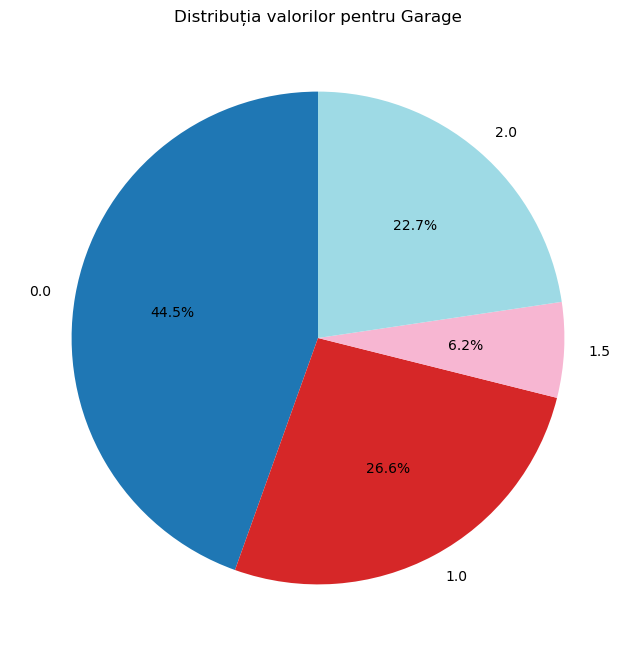

In [36]:
# Grafic pentru Garage
plt.figure(figsize=(8,8))
housing['Garage'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='tab20'
)
plt.title('Distribuția valorilor pentru Garage')
plt.ylabel('')
plt.show()


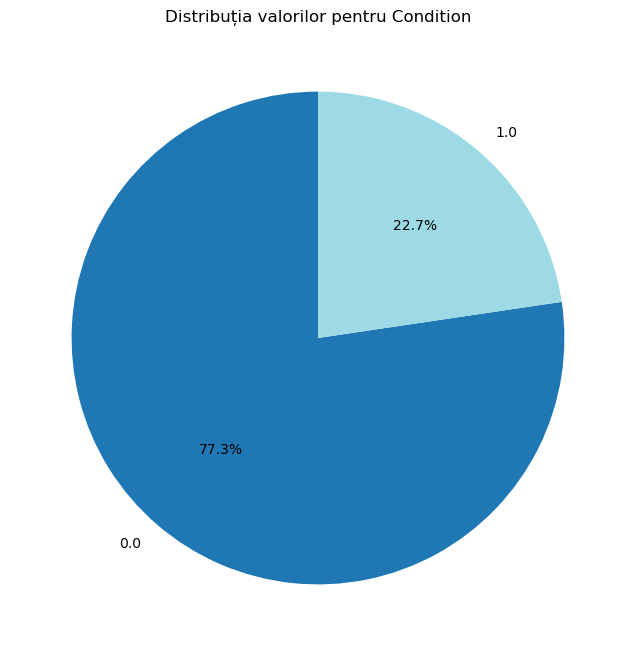

In [37]:
# Grafic pentru Condition
plt.figure(figsize=(8,8))
housing['Condition'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='tab20'
)
plt.title('Distribuția valorilor pentru Condition')
plt.ylabel('')
plt.show()


#### Observație: 
- Am facut grafice pentru Garage si Condition, pentru a studia/observa distrubitia lor. Observam cum pentru pie-chartul al Conditiei, majoritatea au o conditie buna, iar pentru Garage, cele mai multe locuinte nu au spatiu pentru masini

In [39]:
# Calcularea Q1, Q3 și IQR pentru Price
Q1 = housing["Price"].quantile(0.25)
Q3 = housing["Price"].quantile(0.75)
IQR = Q3 - Q1

# Limitele pentru outlieri
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Limita inferioară:", lower_bound)
print("Limita superioară:", upper_bound)

# Eliminarea outlierilor 
housing_original= housing
housing = housing[(housing["Price"] >= lower_bound) & (housing["Price"] <= upper_bound)]
print("Dimensiune dataset original:", housing_original.shape)
print("Dimensiune dataset fără outlieri:", housing.shape)

# Verificarea valorilor pentru siguranță
print("Valori maxime Price după eliminare:", housing["Price"].max())
print("Valori minime Price după eliminare:", housing["Price"].min())

Limita inferioară: 19.0
Limita superioară: 91.0
Dimensiune dataset original: (128, 9)
Dimensiune dataset fără outlieri: (128, 9)
Valori maxime Price după eliminare: 90.0
Valori minime Price după eliminare: 32.0


In [40]:
# Determinăm coeficienții de corelație
housing.corr()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.321623,0.739074,0.578310,0.467262,0.505958,0.567729,0.555242,0.137773
Bedroom,0.321623,1.000000,0.581410,0.841807,0.357425,0.045922,0.621555,0.189651,-0.116611
Space,0.739074,0.581410,1.000000,0.761927,0.422497,0.609800,0.598866,0.407141,0.079876
Room,0.578310,0.841807,0.761927,1.000000,0.499721,0.142749,0.767886,0.285706,0.039036
Lot,0.467262,0.357425,0.422497,0.499721,1.000000,0.202397,0.421500,0.154071,-0.037464
Tax,0.505958,0.045922,0.609800,0.142749,0.202397,1.000000,0.018013,0.420709,-0.133850
Bathroom,0.567729,0.621555,0.598866,0.767886,0.421500,0.018013,1.000000,0.269352,-0.005469
Garage,0.555242,0.189651,0.407141,0.285706,0.154071,0.420709,0.269352,1.000000,0.125645
Condition,0.137773,-0.116611,0.079876,0.039036,-0.037464,-0.133850,-0.005469,0.125645,1.000000


In [41]:
corr_housing = housing.corr().round(2)
print(corr_housing)

           Price  Bedroom  Space  Room   Lot   Tax  Bathroom  Garage  \
Price       1.00     0.32   0.74  0.58  0.47  0.51      0.57    0.56   
Bedroom     0.32     1.00   0.58  0.84  0.36  0.05      0.62    0.19   
Space       0.74     0.58   1.00  0.76  0.42  0.61      0.60    0.41   
Room        0.58     0.84   0.76  1.00  0.50  0.14      0.77    0.29   
Lot         0.47     0.36   0.42  0.50  1.00  0.20      0.42    0.15   
Tax         0.51     0.05   0.61  0.14  0.20  1.00      0.02    0.42   
Bathroom    0.57     0.62   0.60  0.77  0.42  0.02      1.00    0.27   
Garage      0.56     0.19   0.41  0.29  0.15  0.42      0.27    1.00   
Condition   0.14    -0.12   0.08  0.04 -0.04 -0.13     -0.01    0.13   

           Condition  
Price           0.14  
Bedroom        -0.12  
Space           0.08  
Room            0.04  
Lot            -0.04  
Tax            -0.13  
Bathroom       -0.01  
Garage          0.13  
Condition       1.00  


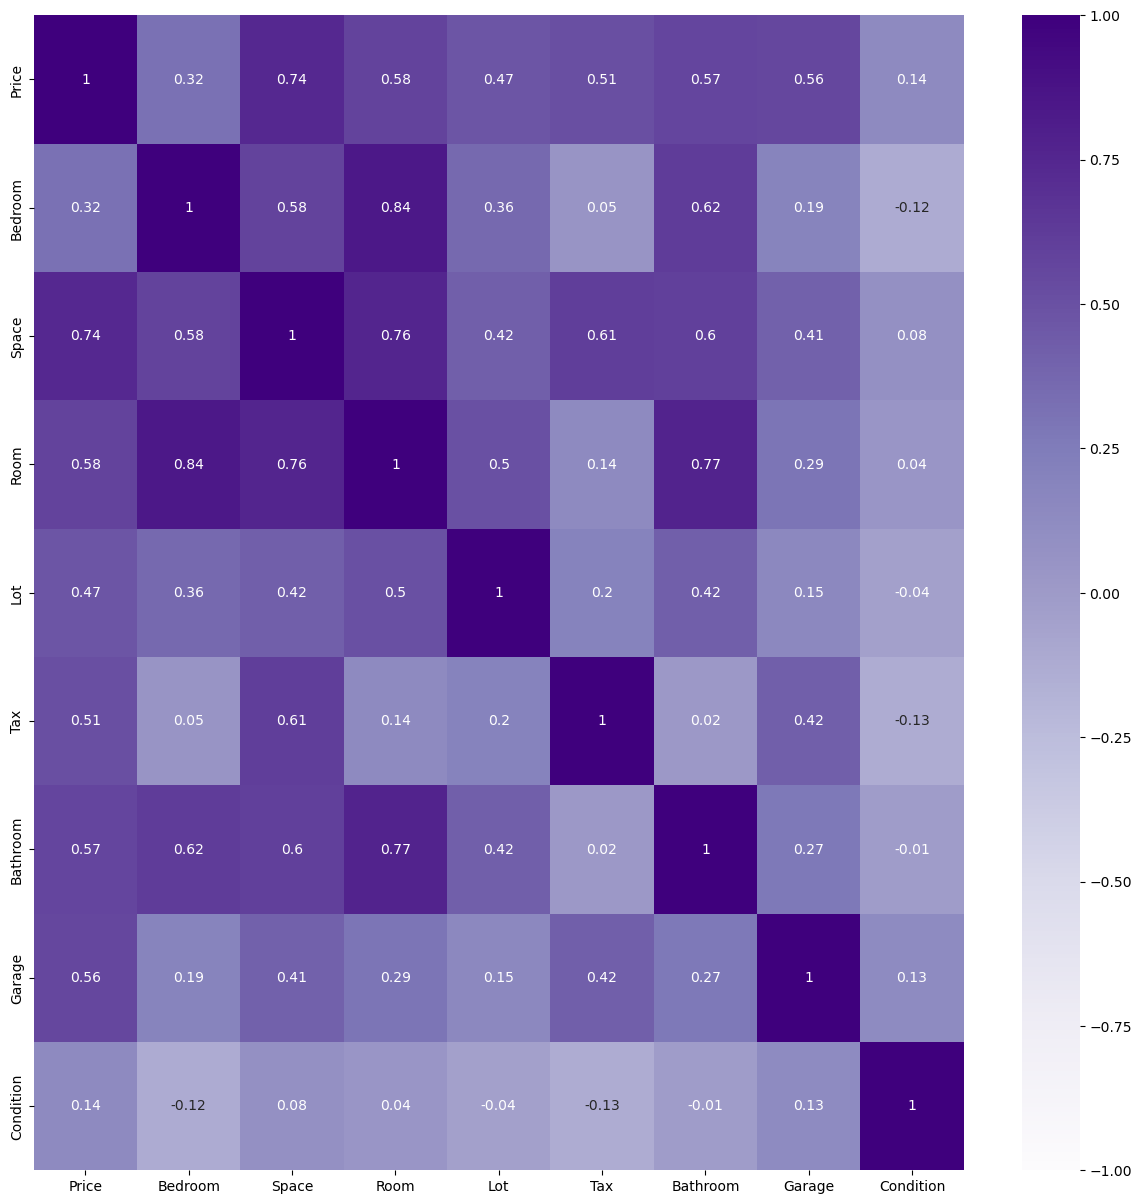

In [85]:
# Hartă de corelare
# Crearea figurii cu dimensiunea 15x15 inch
plt.figure(figsize=(15,15))

# Crearea unui heatmap pentru matricea de corelații 'corr_boston'
sns.heatmap(
    data=corr_housing,   # datele care vor fi afișate în heatmap
    vmin=-1,            # valoarea minimă a culorilor (pentru scală)
    vmax=1,             # valoarea maximă a culorilor (pentru scală)
    center=0,           # centrul culorilor la 0 (pozitive vs negative)
    annot=True,         # afișează valorile numerice în celule
    cmap='Purples'         # paleta de culori folosită
)

# Afișarea graficului
plt.show()


> Se observă că variabila **Price** este **puternic corelată pozitiv cu Space (0.74)** și **slab corelata cu Condition (0.14)**, ceea ce arată că suprafata locuintei influeteaza cel mai mult pretul, iar conditia influenteaza cel mai putin pretul(???) . De asemenea, **Tax**, **Bathroom** și **Garage** au corelații pozitive moderate, indicând că numarul de bai, impozitarea si capacitatea garajului influenteaza si ele pretul. Variabilele cu corelație puternică vor fi principalele predictori în model

#### Observație:
Analizând matricea de corelație, se observă că unele variabile sunt foarte corelate între ele (|r| > 0.7), ceea ce poate provoca **multicolinearitate** în modelul de regresie.
Pentru a evita redundanța și a crește stabilitatea coeficienților, se păstrează doar o variabilă din fiecare pereche puternic corelată și se elimină cealaltă.
* De exemplu, Space și Room au o corelație de 0.76; păstrăm Space și eliminăm Room. 

In [44]:
cols = ['Room']
housing_nemodificat=housing
housing = housing.drop(columns=cols)

# Verificăm dimensiunea noului dataframe
print("Dimensiunea inițială:", housing_nemodificat.shape)
print("Dimensiunea după eliminare:", housing.shape)

# Verificăm coloanele rămase
print("Coloane rămase:", housing.columns.tolist())


Dimensiunea inițială: (128, 9)
Dimensiunea după eliminare: (128, 8)
Coloane rămase: ['Price', 'Bedroom', 'Space', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']


# 5. Modelul de regresie liniară – evaluare și interpretare

In [45]:
# Variabila țintă (valoarea Pretului)
y = housing['Price']
y.head()

0    53.0
1    55.0
2    56.0
3    58.0
4    64.0
Name: Price, dtype: float64

In [46]:
X3 = housing.drop("Price", axis=1)
X3.head()

,Bedroom,Space,Lot,Tax,Bathroom,Garage,Condition
0,2.0,967.0,39.0,652.0,1.5,0.0,0.0
1,2.0,815.0,33.0,1000.0,1.0,2.0,1.0
2,3.0,900.0,35.0,897.0,1.5,1.0,0.0
3,3.0,1007.0,24.0,964.0,1.5,2.0,0.0
4,3.0,1100.0,50.0,1099.0,1.5,1.5,0.0


In [47]:
# Creare date de antrenare și de testare
# Împărțirea datelor în set de antrenare și testare
X3_train, X3_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=42)

print("Dimensiune set antrenare:", X3_train.shape, y_train.shape)
print("Dimensiune set test:", X3_test.shape, y_test.shape)

Dimensiune set antrenare: (102, 7) (102,)
Dimensiune set test: (26, 7) (26,)


In [48]:
# Crearea modelului
housing_model3 = LinearRegression()
# Antrenarea modelului pe datele de antrenare
housing_model3.fit(X3_train, y_train)

LinearRegression()

In [49]:
print("Coeficienți:", housing_model3.coef_) #coeficienții variabolelor 
print("Intercept:", housing_model3.intercept_) #termenul liber din ecuația de regresie.

Coeficienți: [-2.01436576e+00  1.09341470e-02  2.87316429e-01  2.92897890e-03
  7.61009803e+00  5.15822843e+00  1.95922503e+00]
Intercept: 22.885530893530103


In [50]:
# Prezicerea valorilor pentru setul de test
price_pred3 = housing_model3.predict(X3_test)
r2_3=housing_model3.score(X3_test, y_test)
print('R-square: %.4f' % r2_3 )

R-square: 0.6879


In [51]:
# Evaluarea performanței modelului

MSE3 = mean_squared_error( y_test, price_pred3)
print("MSE:", MSE3)

RMSE3 = np.sqrt(MSE3)
print("RMSE:", RMSE3)

MSE: 59.79664180749491
RMSE: 7.732828836040205


> Modelul de regresie liniară cu toate variabilele din setul de date a obținut un coeficient de determinare $R^2$ de 0.6879, ceea ce indică faptul că aproximativ 68% din variația prețului mediu al locuințelor este explicată de variabilele folosite.
Valoarea MSE este 59.7, iar RMSE este 7.73, ceea ce arată că modelul prezice valorile Price cu o abatere medie de aproximativ 7.7000 de dolari.
Aceste rezultate indică o performanță foarte bună, modelul fiind capabil să ofere estimări precise ale prețului locuințelor.

# 6. Ridge si Lasso

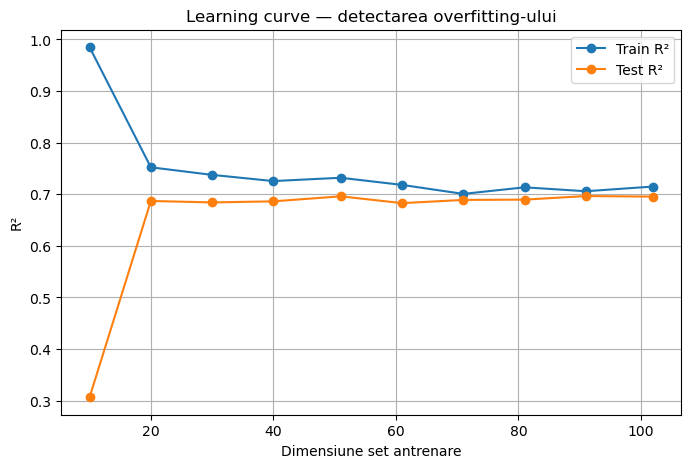

In [77]:
from sklearn.pipeline import make_pipeline

# Copiem datele și împărțim în set train/test
X_m = X3.copy()      # copiați caracteristicile
y_m = y             # ținta
X_train, X_test, y_train, y_test = train_test_split(
    X_m, y_m, test_size=0.2, random_state=42
)  # 80% train, 20% test


pipeline = make_pipeline(StandardScaler(), LinearRegression())


# --- Generarea Curbei de Învățare cu Pipeline-ul ---
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, # Utilizăm Pipeline-ul
    X_m, y_m, 
    cv=5, 
    scoring='r2',  
    train_sizes=np.linspace(0.1, 1.0, 10),)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Train R²')
plt.plot(train_sizes, test_mean, 'o-', label='Test R²')
plt.title('Learning curve — detectarea overfitting-ului')
plt.xlabel('Dimensiune set antrenare')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

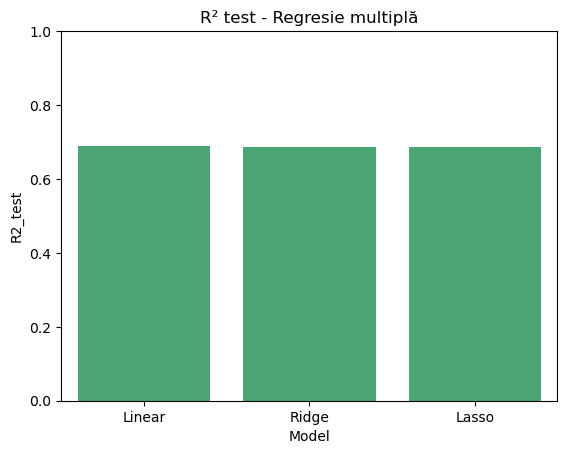

,Model,R2_test,MSE_test
0,Linear,0.687905,59.796642
1,Ridge,0.687819,59.813116
2,Lasso,0.687498,59.874559


In [62]:
#  Regularizare Ridge, Lasso

# Standardizare date
scaler = StandardScaler()  
X_train_s = scaler.fit_transform(X_train)  # calculăm media și deviația standard pe train și transformăm
X_test_s = scaler.transform(X_test)        # transformăm test folosind media și std din train


# Antrenăm modelele
lin_multi = LinearRegression().fit(X_train_s, y_train)             # regresie liniară simplă
ridge_multi = Ridge(alpha=1.0).fit(X_train_s, y_train)            # Ridge cu alpha=1.0
lasso_multi = Lasso(alpha=0.1, max_iter=10000).fit(X_train_s, y_train)  # Lasso cu alpha=0.1 și max_iter mare pentru convergență

# Creăm o listă cu modelele și numele lor pentru iterații mai ușoare
models_multi = [('Linear', lin_multi), ('Ridge', ridge_multi), ('Lasso', lasso_multi)]


# Calculăm R² și MSE pe setul de test pentru fiecare model
r2_multi = [r2_score(y_test, m[1].predict(X_test_s)) for m in models_multi]          # R² test
mse_multi = [mean_squared_error(y_test, m[1].predict(X_test_s)) for m in models_multi]  # MSE test


# Creăm DataFrame pentru vizualizarea rezultatelor
df_r2_multi = pd.DataFrame({
    'Model': [m[0] for m in models_multi],  # numele modelelor
    'R2_test': r2_multi,                    # R² test
    'MSE_test': mse_multi                    # MSE test
})


# Vizualizăm R² pentru fiecare model
sns.barplot(data=df_r2_multi, x='Model', y='R2_test', color='mediumseagreen')  # barplot R²
plt.title('R² test - Regresie multiplă')  # titlu
plt.ylim(0,1)                              # limităm axa Y între 0 și 1
plt.show()
df_r2_multi

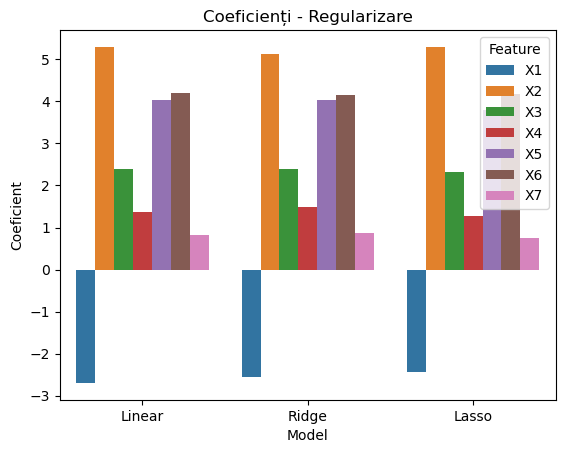

In [83]:
# Numele caracteristicilor
features = [f'X{i+1}' for i in range(X3.shape[1])]

# DataFrame pentru coeficienți
coef_df = pd.DataFrame({
    'Feature': features,
    'Linear': lin_multi.coef_,
    'Ridge': ridge_multi.coef_,
    'Lasso': lasso_multi.coef_,
}).melt(id_vars='Feature', var_name='Model', value_name='Coeficient')

# Barplot
sns.barplot(data=coef_df, x='Model', y='Coeficient', hue='Feature')
plt.title('Coeficienți - Regularizare')
plt.show()


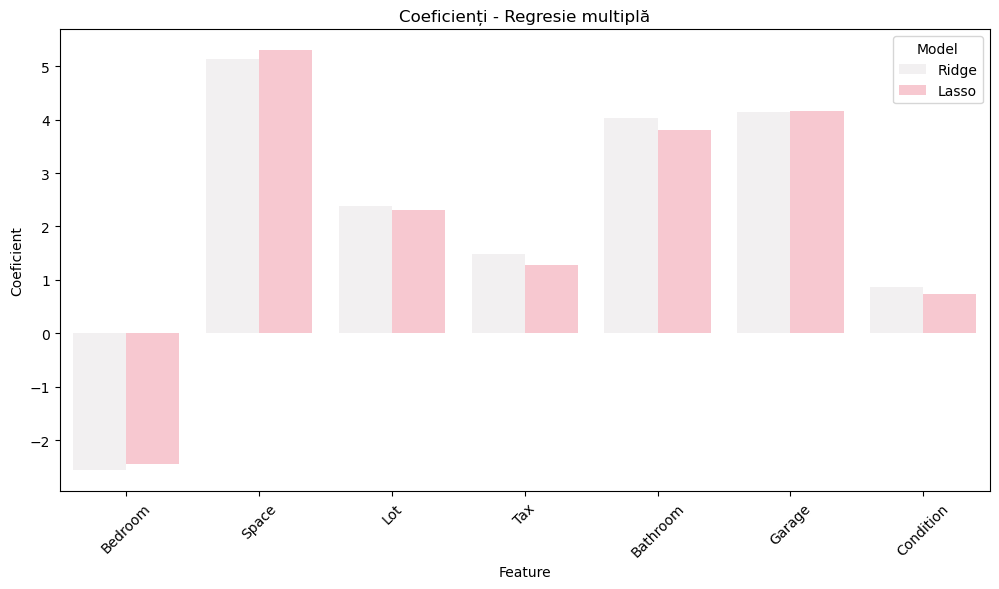

In [87]:
# Coeficienți barplot

# Creăm un DataFrame pentru coeficienți
# 'Feature' = numele caracteristicilor
# Coloanele Ridge, Lasso, ElasticNet = coeficienții fiecărui model
coef_df_multi = pd.DataFrame({
    'Feature': X3.columns,          # numele caracteristicilor
    'Ridge': ridge_multi.coef_,    # coeficienți Ridge
    'Lasso': lasso_multi.coef_,    # coeficienți Lasso
}).melt(
    id_vars='Feature',             # păstrăm coloana Feature ca identificator
    var_name='Model',              # numele modelului devine o coloană
    value_name='Coeficient'        # valorile coeficienților devin o coloană
)


# Vizualizare coeficienți
plt.figure(figsize=(12,6))        # setăm dimensiunea figurii
sns.barplot(
    data=coef_df_multi,
    x='Feature',                  # axa X = caracteristicile
    y='Coeficient',               # axa Y = valoarea coeficientului
    color='Pink',
    hue='Model'                   # culori diferite pentru fiecare model
)
plt.title('Coeficienți - Regresie multiplă')  # titlu grafic
plt.xticks(rotation=45)                        # rotim etichetele caracteristicilor pentru claritate
plt.show()



**Concluzie:** Regularizarea controlează complexitatea prin penalizarea coeficienților mari.Modele au un comportatement asemanator


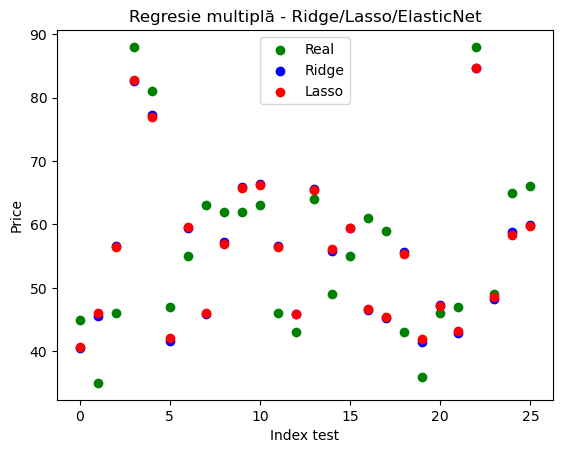

In [88]:
# Grafic predicții vs valori reale pentru regresie multiplă

# Puncte negre = valorile reale ale țintei (Price)
plt.scatter(range(len(y_test)), y_test, color='green', label='Real')

# Puncte albastre = predicțiile modelului Ridge
plt.scatter(range(len(y_test)), ridge_multi.predict(X_test_s), color='blue', label='Ridge')

# Puncte roșii = predicțiile modelului Lasso
plt.scatter(range(len(y_test)), lasso_multi.predict(X_test_s), color='red', label='Lasso')

# Puncte verzi = predicțiile modelului ElasticNet

# Eticheta axei X = indexul observațiilor din setul de test
plt.xlabel('Index test')

# Eticheta axei Y = valoarea reală a țintei (Price)
plt.ylabel('Price')

# Titlul graficului
plt.title('Regresie multiplă - Ridge/Lasso/ElasticNet')

# Afișăm legenda pentru a identifica fiecare model
plt.legend()

# Afișăm graficul
plt.show()


**Concluzie:** Ridge si Lasso sunt foarte aproapiate

# 7.  Optimizarea hiperparametrilor și concluzii finale

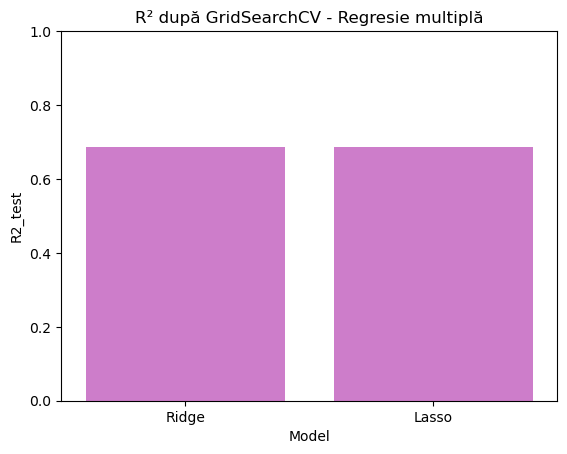

,Model,R2_test
0,Ridge,0.687510
1,Lasso,0.687233


In [86]:
# GridSearchCV pentru Ridge/Lasso/ElasticNet

# Definim grile de valori pentru hiperparametrii
param_grid_alpha = {'alpha': np.logspace(-3, 2, 20)}               # alpha pentru Ridge și Lasso
param_grid_enet = {'alpha': np.logspace(-3,1,10)} # l1_ratio pentru ElasticNet

# Cross-validation cu 5 fold-uri
cv = KFold(n_splits=5, shuffle=True, random_state=42)              # împărțire aleatorie pentru evaluare stabilă

# Definim GridSearchCV pentru fiecare model
ridge_gs = GridSearchCV(Ridge(), param_grid_alpha, cv=cv, scoring='r2', n_jobs=-1)      # Ridge
lasso_gs = GridSearchCV(Lasso(max_iter=10000), param_grid_alpha, cv=cv, scoring='r2', n_jobs=-1)  # Lasso

# Antrenăm GridSearch pentru fiecare model pe setul standardizat de train
ridge_gs.fit(X_train_s, y_train)
lasso_gs.fit(X_train_s, y_train)
enet_gs.fit(X_train_s, y_train)

# Extragem cel mai bun estimator (parametri optimi) pentru fiecare model
best_ridge = ridge_gs.best_estimator_
best_lasso = lasso_gs.best_estimator_

# Calculăm R² pe setul de test folosind cei mai buni parametri
r2_grid_multi = [
    r2_score(y_test, best_ridge.predict(X_test_s)),
    r2_score(y_test, best_lasso.predict(X_test_s)),
]

# Creăm DataFrame pentru vizualizare R² după GridSearchCV
df_r2_grid_multi = pd.DataFrame({
    'Model':['Ridge','Lasso'], 
    'R2_test': r2_grid_multi
})

# Vizualizăm R² pentru fiecare model după GridSearch
sns.barplot(data=df_r2_grid_multi, x='Model', y='R2_test', color='orchid')
plt.title('R² după GridSearchCV - Regresie multiplă')  # titlu grafic
plt.ylim(0,1)                                           # limităm axa Y între 0 și 1
plt.show()
df_r2_grid_multi

- Ridge si Lasso au performanțe foarte apropiate, cu $R^2$ în jur de 0.687 pe setul de test.

- Graficul arată că toate modelele explică aproximativ 68% din variația variabilei țintă, deci oricare dintre ele este potrivit pentru predicție, însă Lasso ar putea fi preferat dacă vrei să reduci numărul de caracteristici. 

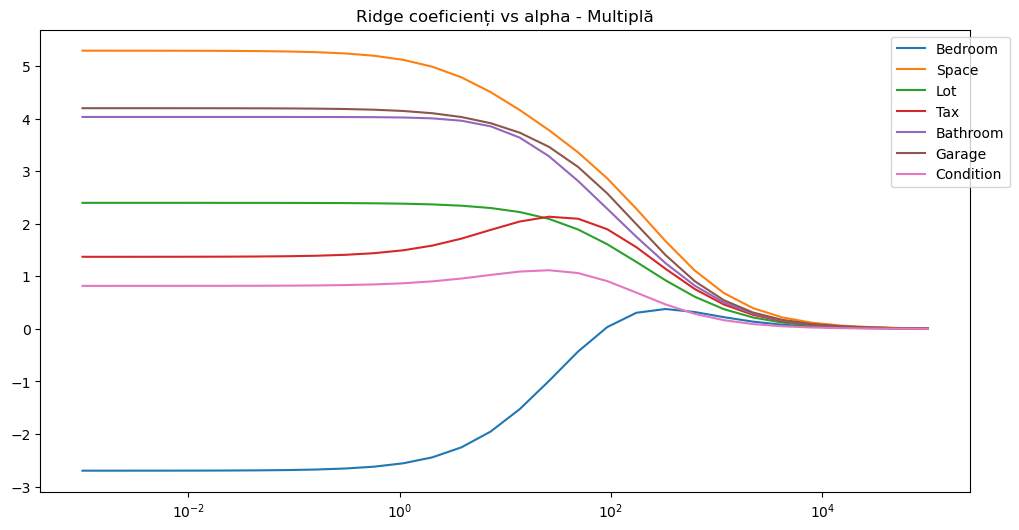

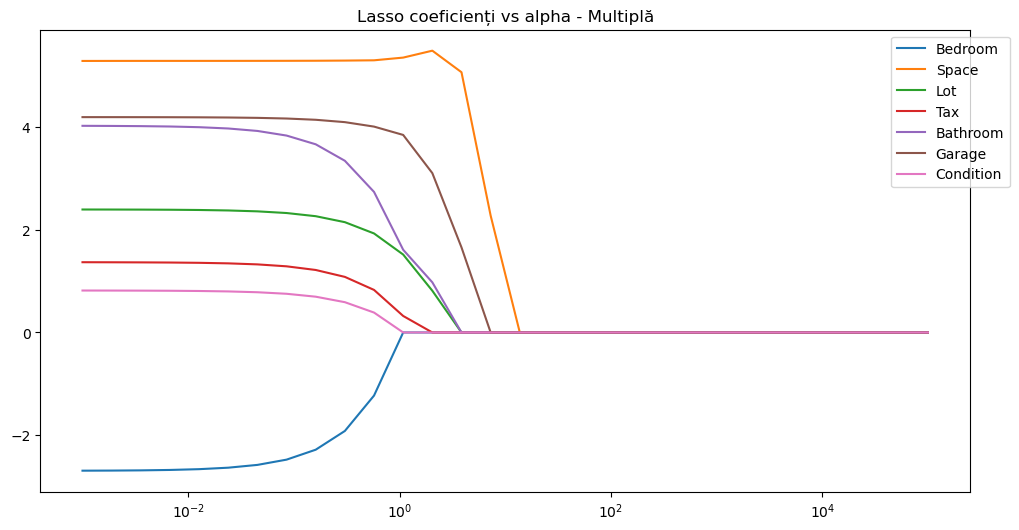

Ridge coef alpha=0.1 (multiplă): [-2.6852057   5.27784177  2.39693099  1.38233951  4.03145729  4.19427508
  0.82304096]
Lasso coef alpha=0.1 (multiplă): [-2.47947751  5.29658871  2.32878343  1.28964471  3.83906394  4.17138286
  0.75426588]
Ridge coef alpha=0.5 (multiplă): [-2.62055973  5.19637888  2.38959815  1.44044833  4.02791432  4.16984131
  0.84616161]
Lasso coef alpha=0.5 (multiplă): [-1.23045629  5.30636743  1.93053291  0.82960877  2.74040999  4.0138421
  0.38803596]


In [89]:
# Coeficienți vs alpha (multiplă)

# Definim un set de valori alpha pentru penalizare
alphas = np.logspace(-3,5,30)  # valori între 0.001 și 100

# Liste pentru coeficienți la fiecare alpha
ridge_coefs_multi, lasso_coefs_multi, enet_coefs_multi = [], [], []

# Valoare fixă pentru l1_ratio la ElasticNet
l1_ratio_val = 0.5


# Iterăm peste toate valorile de alpha
for a in alphas:
    # Antrenăm Ridge pentru alpha curent și salvăm coeficienții
    ridge_coefs_multi.append(Ridge(alpha=a).fit(X_train_s, y_train).coef_)
    
    # Antrenăm Lasso pentru alpha curent și salvăm coeficienții
    lasso_coefs_multi.append(Lasso(alpha=a, max_iter=10000).fit(X_train_s, y_train).coef_)
    

# Transformăm listele în array-uri NumPy pentru manipulare ușoară
ridge_coefs_multi = np.array(ridge_coefs_multi)
lasso_coefs_multi = np.array(lasso_coefs_multi)

# Grafic Ridge coeficienți vs alpha
plt.figure(figsize=(12,6))
for i, feat in enumerate(X3.columns):
    plt.plot(alphas, ridge_coefs_multi[:,i], label=feat)  # fiecare linie = un feature
plt.xscale('log')  # axa X pe scară logaritmică pentru alpha
plt.title('Ridge coeficienți vs alpha - Multiplă')
plt.legend(bbox_to_anchor=(1.05,1))  # legenda în afara graficului
plt.show()


# Grafic Lasso coeficienți vs alpha
plt.figure(figsize=(12,6))
for i, feat in enumerate(X3.columns):
    plt.plot(alphas, lasso_coefs_multi[:,i], label=feat)
plt.xscale('log')
plt.title('Lasso coeficienți vs alpha - Multiplă')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()



# Print coeficienți pentru alpha=0.1
idx = np.argmin(abs(alphas-0.1))  # găsim indexul celei mai apropiate valori alpha=0.1
print("Ridge coef alpha=0.1 (multiplă):", ridge_coefs_multi[idx])
print("Lasso coef alpha=0.1 (multiplă):", lasso_coefs_multi[idx])

# Print coeficienți pentru alpha=0.5
idx = np.argmin(abs(alphas-0.5))  # găsim indexul celei mai apropiate valori alpha=0.1
print("Ridge coef alpha=0.5 (multiplă):", ridge_coefs_multi[idx])
print("Lasso coef alpha=0.5 (multiplă):", lasso_coefs_multi[idx])



Observații pentru $\alpha=0.1$
- Ridge: Toți coeficienții diferiți de zero, cu valori relativ echilibrate.
- Lasso: Unele coeficiente exact zero → selecție de variabile.

Observații pentru $\alpha=0.5$
- Ridge: Toți coeficienții diferiți de zero, cu valori relativ echilibrate.
- Lasso: Unele coeficiente exact zero → selecție de variabile.
- Se observa o scadere fata de  $\alpha=0.1$


# Concluzie 

- Regularizarea Ridge reduce overfitting care aparare intre $10^-2$si $10^0$. Intre $10^2$ si $10^4$ se observa o normalizare, Iar dupa $10^4$ observam underfitting.
- Regularizarea Lasso reduce overfitting care aparare intre $10^-2$si $10^0$, dar dupa $10^1$ apare un underfitting destul de puternic. Astfel normalizare se intampla pe un interval mult mai scurt
- Optimizarea hiperparametrilor prin **GridSearchCV** asigură performanță maximă și modele care generalizează bine pe date noi.